# MDIP PT 2

## 1 Bitcoin

In [1]:
import requests
import json
import datetime
import numpy as np
import time

def get_bitcoin_data(n: int, lag: float, currencies: list[str]):
    url = "https://blockchain.info/ticker"
    output = []

    for i in range(n):
        res = requests.get(url)
        if res.status_code == 200:
            json_data = json.loads(res.text)
            ticker_dict = process_response(json_data, currencies)
            output.append(ticker_dict)
        time.sleep(lag)
                
    return output

def process_response(json_data: dict, currencies: list[str]) -> dict:
    ticker_dict = {}
    for cur in currencies:
        if cur in json_data.keys():
            ticker_dict[cur] = np.mean([json_data[cur]['sell'], json_data[cur]['buy']])
        else:
            ticker_dict[cur] = None
    ticker_dict['time'] = datetime.datetime.now()
    return ticker_dict
    

In [2]:
get_bitcoin_data(2, 1, ['USD', 'CZK', 'XXX'])

[{'USD': 44112.13,
  'CZK': 992942.05,
  'XXX': None,
  'time': datetime.datetime(2024, 1, 7, 13, 34, 56, 683775)},
 {'USD': 44112.13,
  'CZK': 992942.05,
  'XXX': None,
  'time': datetime.datetime(2024, 1, 7, 13, 34, 57, 793615)}]

## 2 Komentare

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

def get_tld(email: str) -> str:
    host_str = email.split('@', 1)[1]
    tld = host_str.split('.',1)[1]
    return tld

def load_data(path: str) -> tuple:
    df = pd.read_csv(path)
    tlds = []
    for ind in df.index:
        tlds.append([get_tld(df['email'][ind]), len(df['body'][ind])])
        
    non_aggregated_df = pd.DataFrame(tlds, columns=['tld', 'comment'])
    df_sorted = non_aggregated_df.sort_values(by=['comment']) # sorting mi nefunguje, netusim proc
    output_df = df_sorted.groupby(['tld'])['comment'].mean().reset_index() # mozna je to kvuli reset_index, ale bez nej vraci group_by series a ne df
    output_df = output_df.sort_values(by=['comment']) # stale nic :(

    serie = pd.Series(non_aggregated_df['comment'].tolist())
    
    return (output_df, serie)

def plot_stat(tld, lengths):
    df, serie = tld, lengths
    sorted_df = df.sort_values(by=['comment'], ascending=False)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].bar(sorted_df['tld'].tolist(), sorted_df['comment'].tolist())
    axs[0].set_title("Průměrná délka komentáře v závislosti na doméně")
    axs[0].set_xticks(axs[0].get_xticks(), axs[0].get_xticklabels(), rotation=90, ha='right')

    axs[1].hist(serie, bins=20, color="tab:orange")
    axs[1].set_title("Histogram délek komentáře")

    plt.suptitle('Délka komentářů')

    return fig

matplotlib.figure.Figure

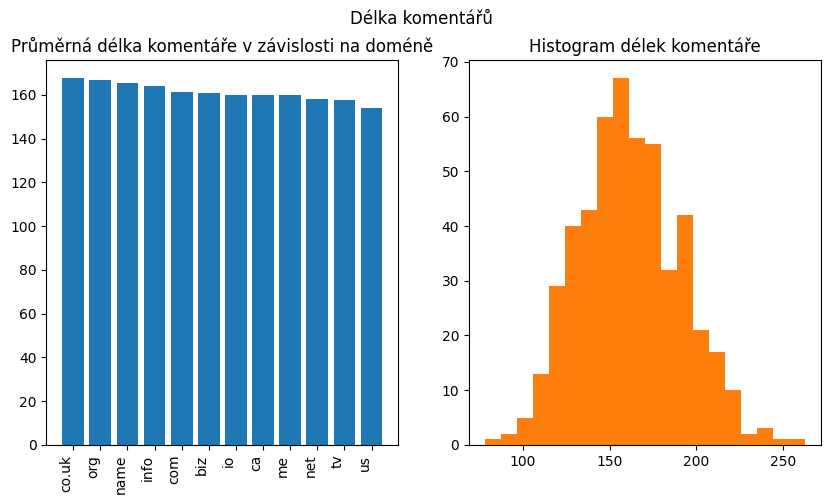

In [204]:
tld, lengths = load_data('comments.csv')
type(plot_stat(tld, lengths))

In [194]:
df.head()


,Unnamed: 0,postId,id,name,email,body
0,0,1,1,id labore ex et quam laborum,Eliseo@gardner.biz,laudantium enim quasi est quidem magnam volupt...
1,1,1,2,quo vero reiciendis velit similique earum,Jayne_Kuhic@sydney.com,est natus enim nihil est dolore omnis voluptat...
2,2,1,3,odio adipisci rerum aut animi,Nikita@garfield.biz,quia molestiae reprehenderit quasi aspernatur\...
3,3,1,4,alias odio sit,Lew@alysha.tv,non et atque\noccaecati deserunt quas accusant...
4,4,1,5,vero eaque aliquid doloribus et culpa,Hayden@althea.biz,harum non quasi et ratione\ntempore iure ex vo...


In [195]:
get_tld('Eliseo@gardner.biz.uk')

'biz.uk'

In [184]:
load_data('comments.csv')

(      tld     comment
 0     biz  160.895522
 1      ca  159.954545
 2   co.uk  167.571429
 3     com  161.105263
 4    info  164.250000
 5      io  160.028571
 6      me  159.843750
 7    name  165.200000
 8     net  158.042553
 9     org  166.872727
 10     tv  157.777778
 11     us  153.750000,
 0      148
 1      168
 2      218
 3      154
 4      132
       ... 
 495    153
 496    118
 497    155
 498    160
 499    147
 Length: 500, dtype: int64)